#### Importing required Libraries

In [38]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [39]:
data=pd.read_csv("../input/questions.csv")

In [40]:
data.head()

,Category,Question,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2.0,क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...,NaN,NaN,NaN,NaN,NaN
1,2.0,Narander modi ji ka speech aapko ksa lgta h ?,NaN,NaN,NaN,NaN,NaN
2,2.0,क्या ममता बनर्जी को धरने में बैठने से कोई फायद...,NaN,NaN,NaN,NaN,NaN
3,2.0,भारत की राजनीति में सबसे घटिया आदमी कौन है ?,NaN,NaN,NaN,NaN,NaN
4,2.0,अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...,NaN,NaN,NaN,NaN,NaN


In [41]:
data.describe()

,Category,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,368.000000,0.0,0.0,0.0,0.0,0.0
mean,2.190217,NaN,NaN,NaN,NaN,NaN
std,0.393007,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN
max,3.000000,NaN,NaN,NaN,NaN,NaN


In [42]:
data.index

RangeIndex(start=0, stop=996, step=1)

In [43]:
data.isnull().sum()

Category      628
Question      628
Unnamed: 2    996
Unnamed: 3    996
Unnamed: 4    996
Unnamed: 5    996
Unnamed: 6    996
dtype: int64

#### Dropping non required cells

In [44]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],axis=1,inplace=True)

In [45]:
data.isnull().sum()

Category    628
Question    628
dtype: int64

#### Dropping null rows

In [46]:
data.dropna(axis=0,inplace=True)

In [47]:
data.isnull().sum()

Category    0
Question    0
dtype: int64

In [48]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            358, 359, 360, 361, 362, 363, 364, 365, 366, 367],
           dtype='int64', length=368)

In [49]:
data.head()

,Category,Question
0,2.0,क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...
1,2.0,Narander modi ji ka speech aapko ksa lgta h ?
2,2.0,क्या ममता बनर्जी को धरने में बैठने से कोई फायद...
3,2.0,भारत की राजनीति में सबसे घटिया आदमी कौन है ?
4,2.0,अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...


#### Replacing number with characters

In [50]:
data.dtypes

Category    float64
Question     object
dtype: object

#### Visualising

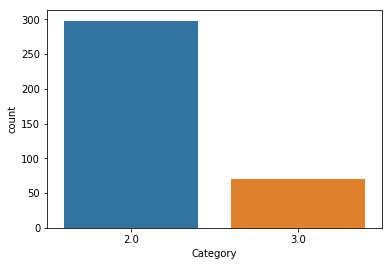

In [51]:
sns.countplot(x='Category',data=data)

https://www.ranks.nl/stopwords/hindi

In [52]:
def mm_clean(df):
 stop_words_lst =['  ',' के ',' का ',' एक ',' में ',' की ',' है ',' यह ',' और ',' से ',' हैं ',' को ',' पर ',' इस ',
                  ' होताकि ',' जो ',' कर ',' मे ',' गया ',' करने ',' किया ',' अपने ',' ने ',' बनी ',' नहीं ',' तो ',
                  ' ही ',' या ',' एवं ',' दिया ',' हो ',' इसका ',' था ',' द्वारा ',' हुआ ',' तक ',' साथ ',' करना ',
                  ' वाले ',' बाद ',' लिए ',' आप ',' कुछ ',' सकते ',' किसी ',' ये ',' इसके ',' सबसे ',' इसमें ',
                  ' थे ',' दो ',' होने ',' वह ',' वे ',' करते ',' बहुत ',' कहा ',' वर्ग ',' कई ',' करें ',' होती ',
                  ' अपनी ',' उनके ',' थी ',' यदि ',' हुई ',' जा ',' ना ',' इसे ',' कहते ',' जब ',' होते ',' कोई ',
                  ' हुए ',' व ',' न ',' अभी ',' जैसे ',' सभी ',' करता ',' उनकी ',' तरह ',' उस ',' आदि ',' कुल ',
                  ' एस ',' रहा ',' इसकी ',' सकता ',' रहे ',' उनका ',' इसी ',' रखें ',' अपना ',' पे ',' उसके '] 
 data['Question'] = data['Question'].str.replace('?','')
 data['Question'] = data['Question'].str.replace('\d', '')
 data['Question'] = data['Question'].str.replace('\t', '')
 data['Question'] = data['Question'].str.replace('(', '')
 data['Question'] = data['Question'].str.replace(')', '')
 data['Question'] = data['Question'].str.replace('!', '')
 data['Question'] = data['Question'].str.replace("|".join(stop_words_lst), " ")
 return data   

data=mm_clean(data)
data

,Category,Question
0,2.0,क्या बीजेपी प्रियंका टक्कर वरुण गांधी खड़ा चाह...
1,2.0,Narander modi ji ka speech aapko ksa lgta h
2,2.0,क्या ममता बनर्जी धरने बैठने कोई फायदा प्राप्त ...
3,2.0,भारत राजनीति सबसे घटिया आदमी कौन
4,2.0,अरविंद केजरीवाल प्रधानमंत्री मोदी इतने बुरे क्...
5,2.0,पीएम मोदी राफेल सौदे जुड़े विपक्ष सवालों जवाब ...
6,2.0,यदि सपा बसपा गठबंधन कॉन्ग्रेस भी शामिल जाए क्य...
7,2.0,हिंदू-मुसलमान विवाद किसी देश किस प्रकार हानि है
8,2.0,कौन सा भाषा जो कि सब ज्यादा देशों बोला जाता
9,2.0,गौरव जी यह बताइए कि ने बीजेपी पार्टी क्यों ज्व...


#### Separating data

In [53]:
data['Category'].value_counts()

2.0    298
3.0     70
Name: Category, dtype: int64

In [54]:
y=data.Category
X=data.Question

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# All right chou chou

In [57]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [58]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [59]:
import nltk
from nltk.tokenize import word_tokenize

Question = data.Question.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(Question)

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(246, 383) (122, 383)


##### Model 1

In [61]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, y_train)

In [62]:
from  sklearn.metrics  import accuracy_score

predicted = clf.predict(test_vectors)

print(accuracy_score(y_test,predicted))

0.819672131147541


##### Model 2

In [63]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression().fit(train_vectors, y_train)

In [64]:
from  sklearn.metrics  import accuracy_score

predicted = logmodel.predict(test_vectors)

print(accuracy_score(y_test,predicted))

0.8114754098360656


## Help Me I dont know what i did

In [65]:
data1=data.drop(data.index[0:200])

In [66]:
data1.index

Int64Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
            ...
            358, 359, 360, 361, 362, 363, 364, 365, 366, 367],
           dtype='int64', length=168)

In [67]:
y1=data1.Category
X1=data1.Question

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
...     X1, y1, test_size=0.33, random_state=42)

In [69]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [70]:
vectorizer = TfidfVectorizer()
train_vectors1 = vectorizer.fit_transform(X_train)
test_vectors1 = vectorizer.transform(X_test)
print(train_vectors1.shape, test_vectors1.shape)

(112, 189) (56, 189)


In [71]:
clf = MultinomialNB().fit(train_vectors1, y_train)

In [72]:
predicted = clf.predict(test_vectors1)

print(accuracy_score(y_test,predicted))

0.8928571428571429


#### 2

In [73]:
logmodel=LogisticRegression().fit(train_vectors1, y_train)

In [74]:
predicted = logmodel.predict(test_vectors1)

print(accuracy_score(y_test,predicted))


0.8928571428571429
